# analyse back projected scores

In [1]:
import os
import numpy as np
import pandas as pd
import pickle

from collections import OrderedDict

import matplotlib.pyplot as plt
import seaborn as sns

# modified visualpriors library
from transforms import VisualPriorRepresentation

from classes_analyse_nodes import (
    ImageDataset,
    Pattern_Generator,
    Activation_Pattern,
    NetworkScorer,
    calculate_integration_coeff,
    taskonomy_activation_layer_shapes,
    correlate_integration_beauty,
    )

import torch
import torch.utils.model_zoo # required to load nets
from torchvision.models.feature_extraction import get_graph_node_names, create_feature_extractor

from scipy.stats import pearsonr, spearmanr

# import scores

In [2]:
BACKPROJECTED_SCORES_FOLDER = './backprojected_scores_frac33'

In [3]:
# when running not for the first time (for this DNN)
# load existing scores from previously executet iterations
iterations = [int(filename[len("iteration_"):])
              for filename in os.listdir(BACKPROJECTED_SCORES_FOLDER)]

highest_iteration = max(iterations)

highest_iteration = 1600

ns = NetworkScorer.load(os.path.join(BACKPROJECTED_SCORES_FOLDER, "iteration_" + str(highest_iteration)))

In [4]:
ns.subset_iterations_count

1600

## look at score distributions

In [5]:
mask = ns.scores['conv1'].flatten() != 0
mask.sum() /  mask.shape[0]

tensor(1.)

In [6]:
list(ns.scores.keys())[35]

'layer3.4.conv2'

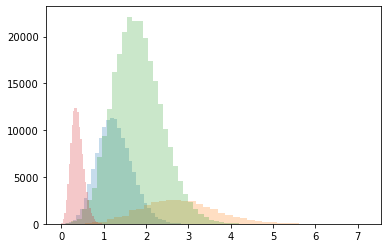

In [70]:
for i in [10, 20, 30, 40]:
    plt.hist(ns.scores[list(ns.scores.keys())[i]].flatten(), bins=40, alpha = .25)

In [ ]:
scs = ns.scores['conv1'].flatten()[mask]

In [ ]:
scs = scs[:,np.newaxis]

In [ ]:
scs.max()

In [ ]:
SCORE_HIST_PLOT_FOLDER = './score_hists'

In [ ]:
for layer_name, layer_scores in ns.scores.items():
    mask = layer_scores.flatten() != 0
    plt.hist(layer_scores.flatten()[mask], bins=35)
    plt.savefig(os.path.join(SCORE_HIST_PLOT_FOLDER, layer_name + '.png'))
    plt.close()

In [ ]:
len(list(ns.scores.keys()))

## are there the same nodes across datasets relevant ?
this would mean that specific areas in the network are more relevant for integration than others ?

the correlation between the layer activations in itself varies quite little (add plots to prove this). meaning that holistic processing has specific or nuanced effects. 

That little variation in the correlation between full and mean activation correlates well with beauty.

## Daniels idea: Wäre es eine Alternative, erstmal die Integration Values über die Layers in einem Netzwerk miteinander zu korrelieren? 
#rest der idee in der Mail

## use most important nodes to sort images
perform PCA of images in activation space of most important nodes

## compare between networks
distribution of scores between layers

most important nodes



## "behavioural" relevance of network nodes
replace weights of most important nodes with random weights and look at performance of network in:
- predicting beauty
- performing their respective task

## image features relevant to nodes
which features of the image do importand nodes look at, idea: jumple images and look at how response of important nodes changes in comparison to average change in node acivation in network

## compare results to results of random scores backprojected onto nodes
or some other random baseline